# Model Evaluation & Fitting
## Predicting Boston Housing Prices

In [5]:
# import libraries  here
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets
import re
import seaborn as sns
pd.set_option('display.max_columns', None)

## Getting Started
In this project, you will use the Boston Housing Prices dataset to build several models to predict the prices of homes with particular qualities from the suburbs of Boston, MA.
We will build models with several different parameters, which will change the goodness of fit for each. 

---
## 1- Data Exploration
 

### Import and explore the data. Clean the data for outliers and missing values. 

Download the Boston dataset from [here](https://drive.google.com/file/d/1Bux3hwVYr6BuFbdUIK2db1lOY6EqghfD/view?usp=sharing) , place it in the data folder and import it as dataframe. **The features in the dataset are described [here](https://www.kaggle.com/prasadperera/the-boston-housing-dataset)** 
<br> Since we want to predict the value of houses, the **target variable**, `'MEDV'`, will be the variable we seek to predict. 

In [7]:
#your code here
df = pd.read_csv('Boston.csv').drop(columns = 'Unnamed: 0')

### Next, we want to explore the data. Pick several variables you think will be most correlated with the prices of homes in Boston, and create plots that show the data dispersion as well as the regression line of best fit.

In [8]:
#your code here
best_variables = ['rm','lstat','tax','ptratio']
print("""
- I take rm because I think a house with more rooms is bigger and therefore more expensive
- I lstat because I assume that the rate of poor people means that a area will contain a lot of lower cost houses
- I take tax because I think bigger houses pay more taxes. Bigger houses are usually more expensive
- I take ptratio I think people with higher incomes would prefer to move into areas where there better school.
""")


- I take rm because I think a house with more rooms is bigger and therefore more expensive
- I lstat because I assume that the rate of poor people means that a area will contain a lot of lower cost houses
- I take tax because I think bigger houses pay more taxes. Bigger houses are usually more expensive
- I take ptratio I think people with higher incomes would prefer to move into areas where there better school.



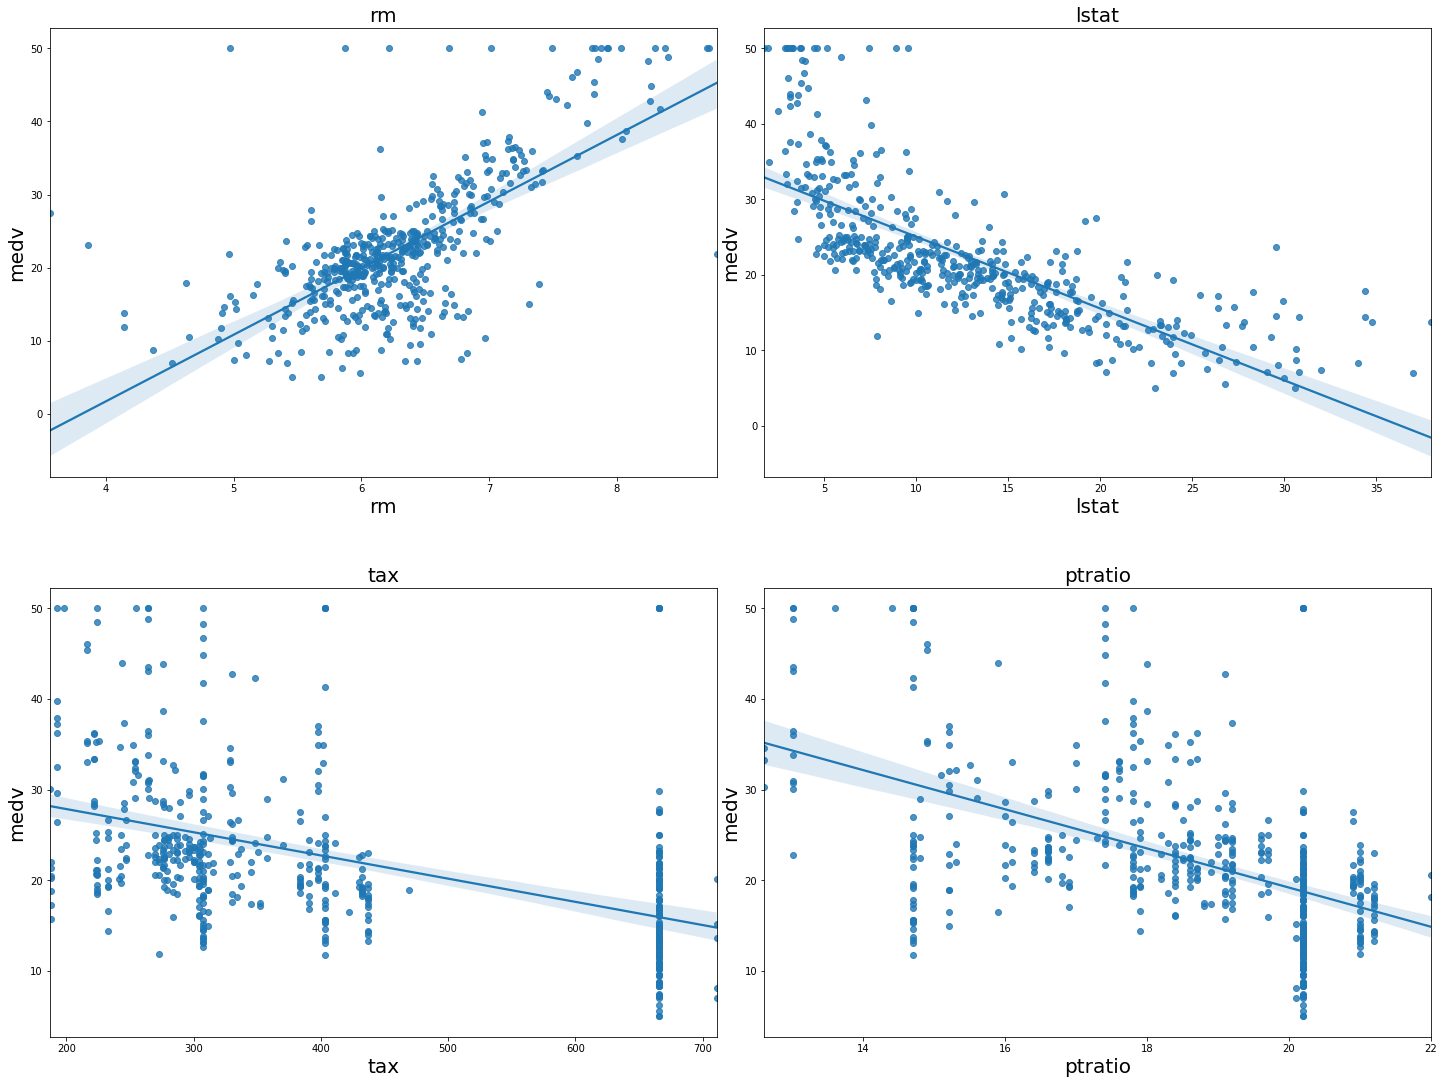

In [9]:
# Your plots here
#variables
fs = 20

fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(20, 15))
index = 0
axs = axs.flatten()
for k in best_variables:
    sns.regplot(x=k,y='medv' ,data=df, ax=axs[index])
    axs[index].set_title(k).set_fontsize(fs)
    axs[index].set_xlabel(k).set_fontsize(fs)
    axs[index].set_ylabel('medv').set_fontsize(fs)
    index += 1
    
plt.tight_layout(pad=0.5, w_pad=0.5, h_pad=5.0)
plt.show()

### What do these plots tell you about the relationships between these variables and the prices of homes in Boston? Are these the relationships you expected to see in these variables? 
- Reference: https://www.kaggle.com/c/boston-housing

In [10]:
### Your response here
print("""
Yes my expectations are met:
- More rooms = higher price
- Higher rate of population with lower status is lower price
- This value suprisis me I would have expected that more taxes means more expensive houses.
- pupil teacher ratio. The higher the number of pupils vs teacher has a negative effect on housing prices.

""")


Yes my expectations are met:
- More rooms = higher price
- Higher rate of population with lower status is lower price
- This value suprisis me I would have expected that more taxes means more expensive houses.
- pupil teacher ratio. The higher the number of pupils vs teacher has a negative effect on housing prices.




### Make a heatmap of the remaining variables. Are there any variables that you did not consider that have very high correlations? What are they?

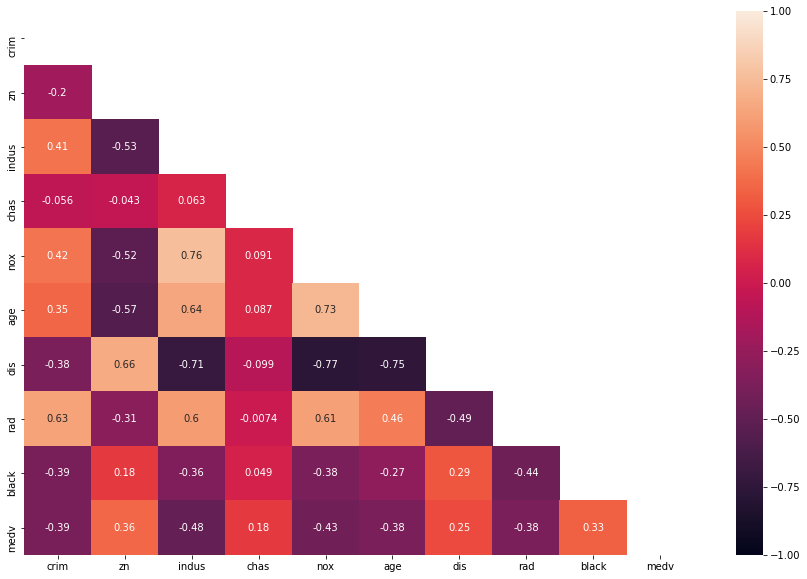

In [11]:
#your code here
plt.rcParams["figure.figsize"]=(15,10)
df_remaining =  df.drop(columns = best_variables)
mask = np.zeros_like(df_remaining.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df_remaining.corr(),vmin=-1,vmax=1,annot=True,mask=mask)
plt.show()

#### Significant correlations


In [12]:
#your code here
correlations= pd.DataFrame(df_remaining.corr()['medv'])
# correlations.loc[cor]
print(list(correlations.loc[(correlations.medv < -0.4)| 
                 (correlations.medv > 0.4)].index)
,"""indus and nox also seem to have ok correlations"""     )


['indus', 'nox', 'medv'] indus and nox also seem to have ok correlations


### Calculate Statistics
Calculate descriptive statistics for housing price. Include the minimum, maximum, mean, median, and standard deviation. 

In [13]:
# Your code here
df.describe().T

,count,mean,std,min,25%,50%,75%,max
crim,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677082,88.9762
zn,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
indus,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
chas,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
nox,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
rm,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
age,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
dis,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
rad,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
tax,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


----

## 2- Developing a Model

### Implementation: Shuffle and Split Data
Split the data into the testing and training datasets. Shuffle the data as well to remove any bias in selecting the traing and test. 

In [14]:
#your code here
from sklearn.model_selection import train_test_split
features = best_variables + ['indus','nox']

y = df['medv'].astype(int)
# X = df.drop(columns = 'medv', axis =1)
X = df[features]
# X['tax'] = X['tax'].astype(float)

# Your code here:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle = True)

----

## 3- Analyzing Model Performance
Next, we are going to build a Random Forest Regressor, and test its performance with several different parameter settings.

### Learning Curves
Lets build the different models. Set the max_depth parameter to 2, 4, 6, 8, and 10 respectively. 

In [16]:
from sklearn.ensemble import RandomForestClassifier
#paolo: change import
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix, accuracy_score

model2 = RandomForestRegressor(max_depth=2, random_state=0)
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)
pd.DataFrame({'test':y_test, 'predicted':y_pred2})

print(model2.score(X,y))
#paolo: get the error 'RandomForestRegressor not defined' - I change the import 

0.7740784400646286


In [17]:
#your code here
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix, accuracy_score

results = pd.DataFrame()
for i in range(2,12,2):
    model = RandomForestRegressor(max_depth=i, random_state=0)
    model.fit(X_train, y_train)
    
    
    Y_pred_train = model.predict(X_train)
    y_pred = model.predict(X_test)
    
#     print(model.score(X,y))
    d = {'max_depth' : i,
        'accuracy' : model.score(X,y),
        } 

    results = results.append(d,ignore_index = True)

results  
#paolo: good idea to place the data into a dataframe and  run a loop over the 
#max_depth values. :)

,accuracy,max_depth
0,0.774078,2.0
1,0.890718,4.0
2,0.931549,6.0
3,0.946845,8.0
4,0.953804,10.0


Now, plot the score for each tree on the training set and on the testing set.

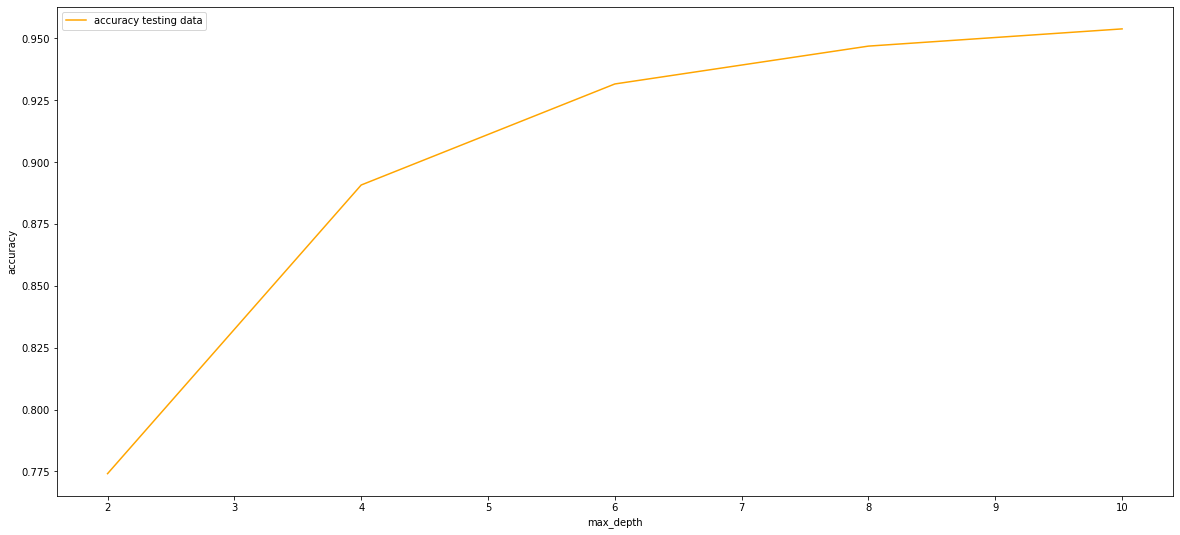

In [18]:
# Produce a plot with the score for the testing and training for the different max depths
#your code here
plt.figure(figsize=(20, 9))
sns.lineplot(data=results, x='max_depth', y='accuracy', color='orange', label='accuracy testing data')

plt.legend()
plt.show()
#paolo: ok good plot but this is only for testing, 
# it would help assess overfit/bias if you plot also the accuracy for training
# next to it

What do these results tell you about the effect of the depth of the trees on the performance of the model?


In [19]:
# Your response here

print('It seems that the model improves on the moment that the depth is increased')

It seems that the model improves on the moment that the depth is increased


### Bias-Variance Tradeoff
When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10?

In [20]:
# Your response here
print("""
When the model is trained with a maximum depth of 1 is more likely to suffer
high bias as both its training score and validation score are quite low. When the model is trained with a maximum depth of 10 (more complex),
it is more likely to suffer from high variance as the difference between the training and validation score is quite large --
meaning that the model is likely to be suffering from 'overfitting'


""")


When the model is trained with a maximum depth of 1 is more likely to suffer
high bias as both its training score and validation score are quite low. When the model is trained with a maximum depth of 10 (more complex),
it is more likely to suffer from high variance as the difference between the training and validation score is quite large --
meaning that the model is likely to be suffering from 'overfitting'





### Best-Guess Optimal Model
What is the max_depth parameter that you think would optimize the model? Based on your previous results run your model and explain its performance.

#### Train the Random forest regressor model with the optimal value for max_depth

In [21]:
#your code here
# will use a model with a depth of 6. After the 6 the R2 increase is very minimal

model = RandomForestRegressor(max_depth=6, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
pd.DataFrame({'test':y_test, 'predicted':y_pred})

model.score(X,y)

0.9315490437210702

#### Use the mean absolute error (MAE) to calculate the performance of the model

In [22]:
#your code here
import sklearn.metrics
sklearn.metrics.mean_absolute_error(y_test, y_pred)

2.2301224463114067

#### Use the root mean squared error (RMSE) to calculate the performance of the model

In [23]:
#your code here
import math
mse = sklearn.metrics.mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
rmse

3.107600566258372

#### Create a function that calculates  and returns the r2 score as performance metric

In [24]:
#your code here
def r2_score(y_test, y_pred):
    return sklearn.metrics.r2_score(y_test, y_pred)

#### Calculate the r2 score of the model using the function defined above

In [25]:
#your code here
r2_score(y_test, y_pred)

0.8817695340588592

#### Bonus question
Read [this article](https://medium.com/human-in-a-machine-world/mae-and-rmse-which-metric-is-better-e60ac3bde13d) 
about the differences between MAE and RMSE. Do you think that one of the two types of error is more appropriate for this problem, and why?

In [26]:
#your answer here

### 4 - Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

In [25]:
#Your response here
#data is far out too date
#race metrics might be controversial these days



In [27]:
#paolo: check ok